<a href="https://colab.research.google.com/github/BogereMark879/Bogere-mark/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House Price Prediction 

In [ ]:
#No.1 I begin with uploading the dataset to my google drive
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
#No.2 I then confirm that my dataset is available for use
for fn in uploaded.keys():
  print('Lilian Uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Lilian Uploaded file "test.csv" with length 451405 bytes
Lilian Uploaded file "train.csv" with length 462137 bytes


In [ ]:
#no.3 I view my dataset... atleast the first 5 entires in the Dataset
import io
import pandas as pd

df_train = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf8')))
print(df_train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
df_test = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf8')))
print(df_test.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

In [ ]:
#No.3 Here I check the missing values. I will check the missing value counts in each column. I'll use percentage count to see what percentage is missing in each column.
missing_count = (df_train.isnull().sum() / len(df_train)) *100 

#I'll filter to find columns with missing values >0
missing_count = missing_count[missing_count >0]

print(missing_count.sort_values())


Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64


In [ ]:
#The last 4 features above have a large number of missing values. I will have to deal with that.

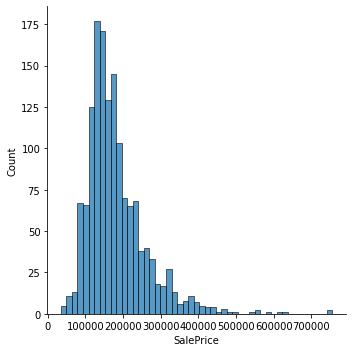

In [ ]:

import seaborn as sns
sns.displot(df_train['SalePrice'])

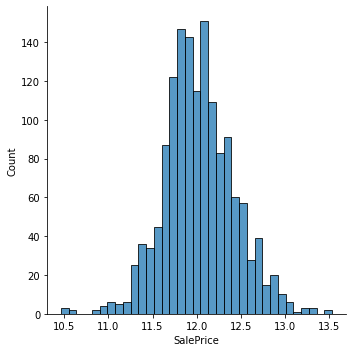

In [ ]:
#Machine learning models work best with data that is normally distributed. Unlike the above plot result of the SalePrice variable
#Let's transform the saleprice variable using the log scale

import numpy as np

SalePrice = np.log(df_train['SalePrice'])
sns.displot(SalePrice)

In [ ]:
#Finding numeric features

numeric_data = df_train.select_dtypes(include = [np.number])

#Finding categorical features

categorical_data = df_train.select_dtypes(exclude = [np.number])

#Lets look at an output of how many numerical and categorical features we have

print('There are {0} numerical features and {1} categorical features in the training dataset'.\
      format(numeric_data.shape[1], categorical_data.shape[1])) 

There are 38 numerical features and 43 categorical features in the training dataset


In [ ]:
#Correlation plot for the numeric variables
#But first, let's drop the ID column from among the numeric variables

del numeric_data['Id']
numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

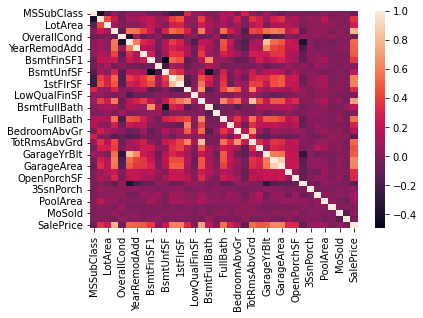

In [ ]:
corr = numeric_data.corr()

#Plot the correlation matrix
sns.heatmap(corr)

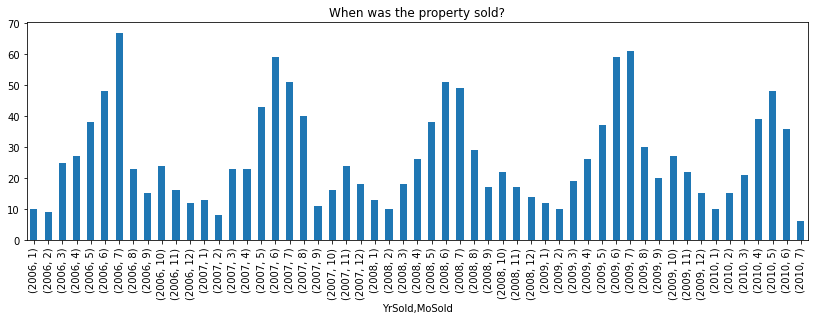

In [ ]:
#When was the property sold in which year
import matplotlib.pyplot as plt
%matplotlib inline 

df_train.groupby(['YrSold', 'MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title("When was the property sold?")
plt.show()

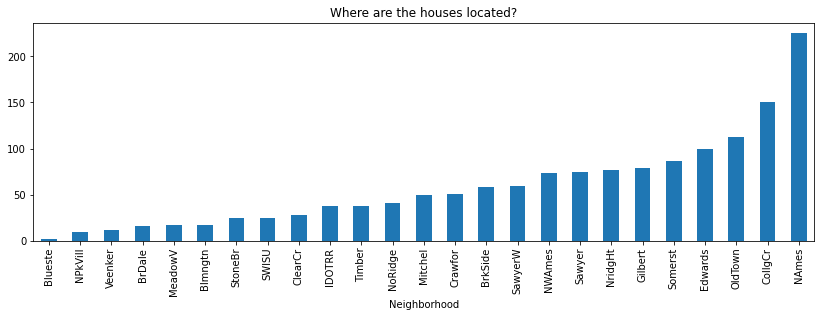

In [ ]:
#Location of the houses
df_train.groupby(['Neighborhood']).Id.count().\
sort_values().\
plot(kind='bar', figsize=(14,4))
plt.title("Where are the houses located?")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

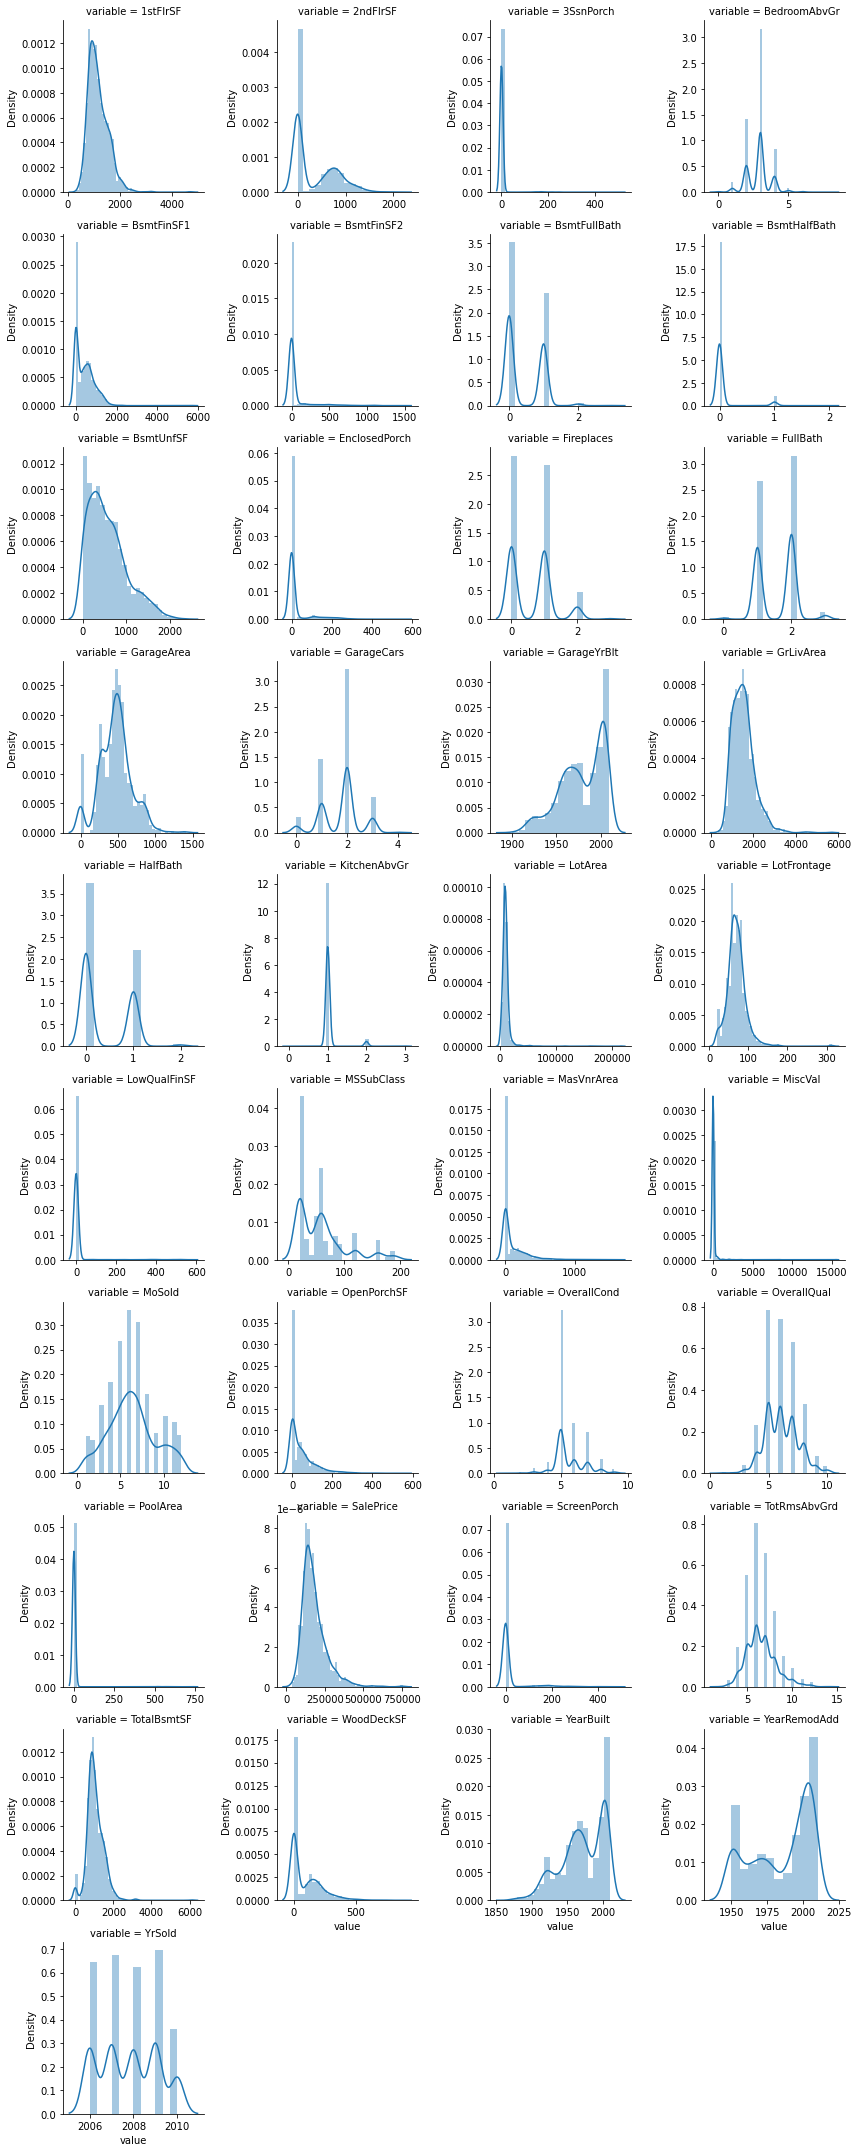

In [ ]:
#Distribution of numeric features

f = pd.melt(df_train, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False) 
g = g.map(sns.distplot, 'value')

In [ ]:
#Conversion from numeric features to Categorical features.
df_train['MSSubClass'] = df_train.MSSubClass.apply(lambda x: str(x))
df_train['MoSold'] = df_train.MoSold.apply(lambda x: str(x))
df_train['YrSold'] = df_train.YrSold.apply(lambda x: str(x))

#Finding numeric features

numeric_data = df_train.select_dtypes(include = [np.number])

#Finding categorical features

categorical_data = df_train.select_dtypes(exclude = [np.number])

#Lets look at an output of how many numerical and categorical features we have

print('There are {0} numerical features and {1} categorical features in the training dataset'.\
      format(numeric_data.shape[1], categorical_data.shape[1])) 

There are 35 numerical features and 46 categorical features in the training dataset


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


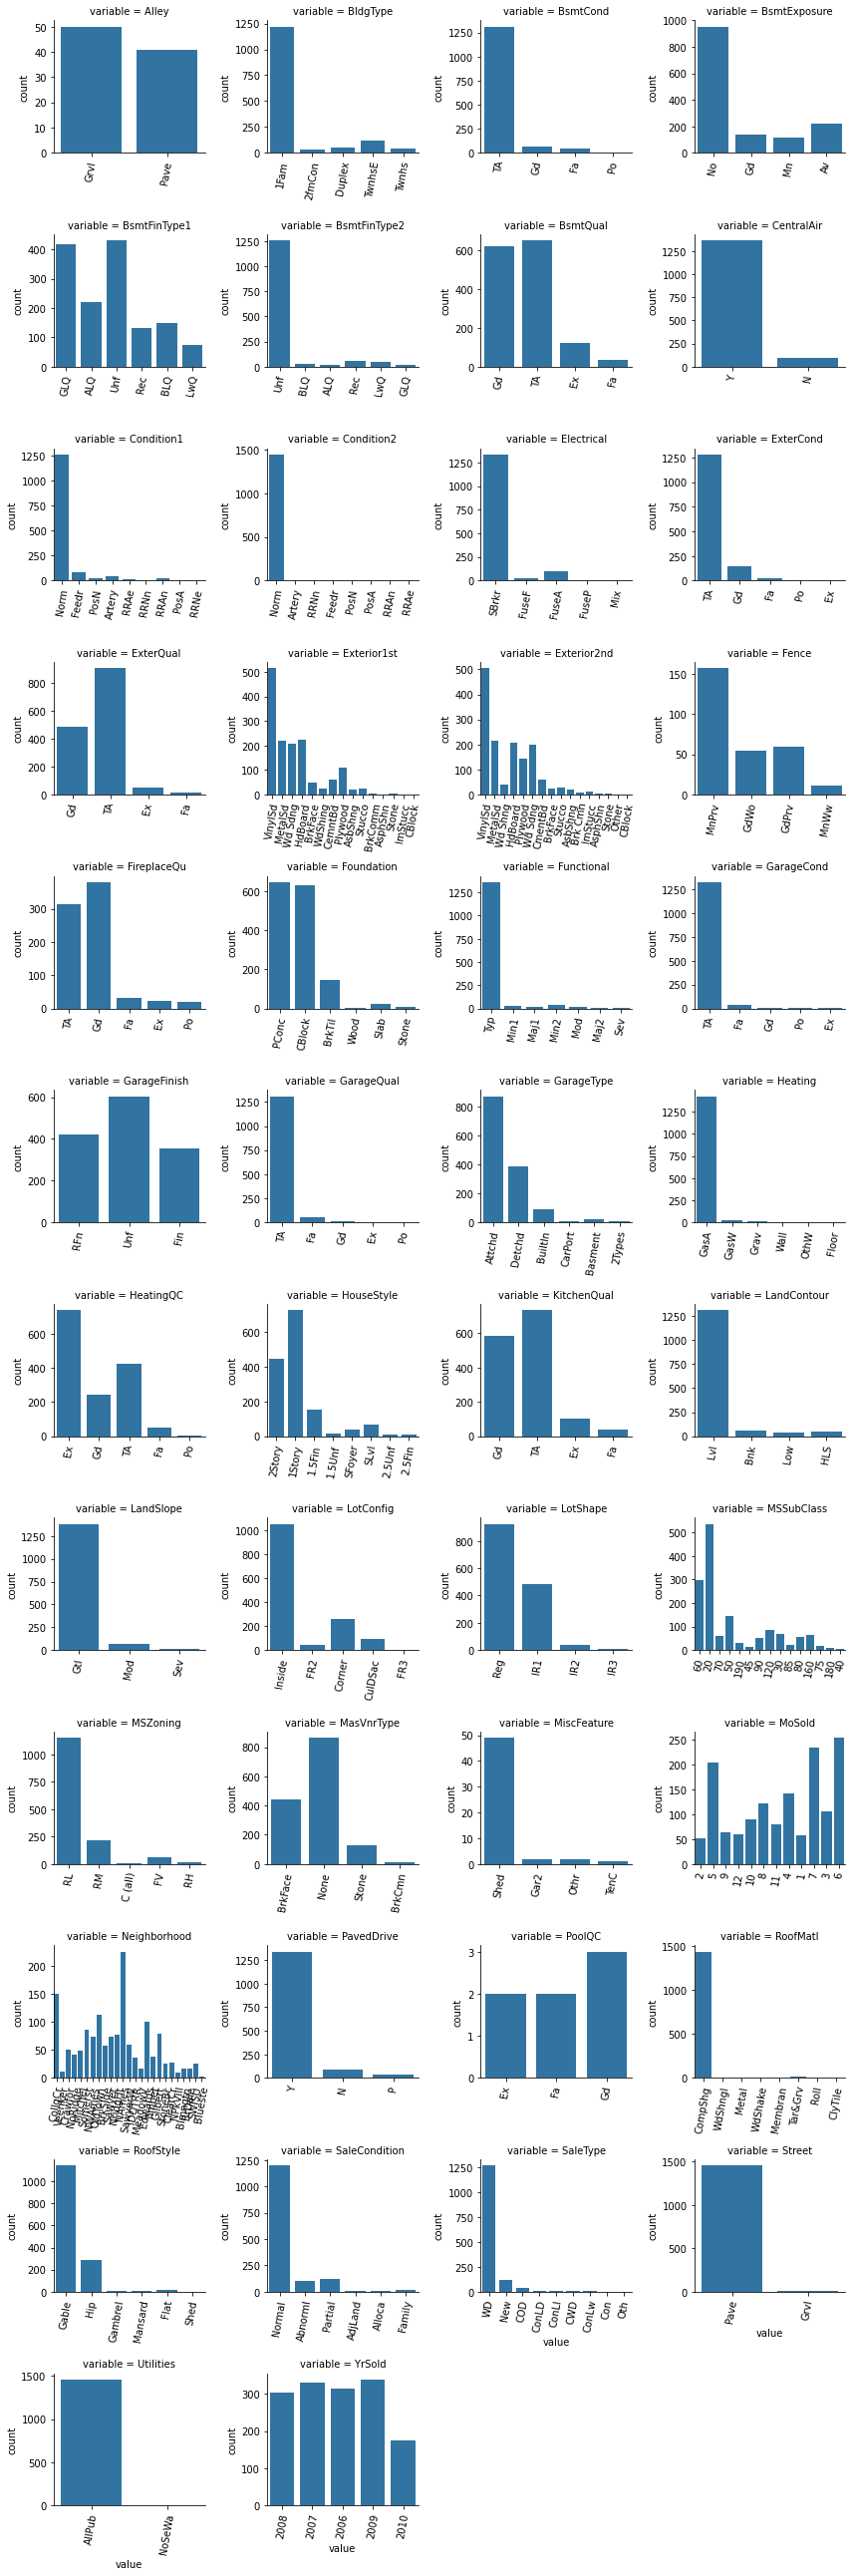

In [ ]:
#Next we will plot the categorical features

f = pd.melt(df_train, value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False) 
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=80) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [ ]:
#Using the replace function to change the categorical values to numeric values
# Alley
df_train.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)
df_train['Alley'].unique()

array([nan,  1.,  2.])

In [ ]:
# Lotshape 
df_train.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)
df_train['LotShape'].unique()

array([1, 2, 3, 4])

In [ ]:
# Building Type
df_train.BldgType.replace({'1Fam':1, '2fmCon':2, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5}, inplace=True)
df_train['BldgType'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
# Land Contour
df_train.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4,}, inplace=True)
df_train['LandContour'].unique()

array([4, 3, 1, 2])

In [ ]:
# Utilities
df_train.Utilities.replace({'Elo':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4,}, inplace=True)
df_train['Utilities'].unique()

array([4, 2])

In [ ]:
# LandSlope
df_train.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)
df_train['LandSlope'].unique()

array([3, 2, 1])

In [ ]:
# Exterior Quality
df_train.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df_train['ExterQual'].unique()

array([4, 3, 5, 2])

In [ ]:
# Exterior Condition
df_train.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df_train['ExterCond'].unique()

array([3, 4, 2, 1, 5])

In [ ]:
# Basement Quality
df_train.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df_train['BsmtQual'].unique()

array([ 4.,  3.,  5., nan,  2.])

In [ ]:
# Basement Condition
df_train.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df_train['BsmtCond'].unique()

array([ 3.,  4., nan,  2.,  1.])

In [ ]:
# Basement Exposure
df_train.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)
df_train['BsmtExposure'].unique()

array([ 1.,  4.,  2.,  3., nan])

In [ ]:
# Finished Basement 1 rating
df_train.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
df_train['BsmtFinType1'].unique()

array([ 6.,  5.,  1.,  3.,  4., nan,  2.])

In [ ]:
# Finished basement Rating 2
df_train.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
df_train['BsmtFinType2'].unique()

array([ 1.,  4., nan,  5.,  3.,  2.,  6.])

In [ ]:
# Heating Quality and Condition
df_train.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df_train['HeatingQC'].unique()

array([5, 4, 3, 2, 1])

In [ ]:
# Kitchen Quality
df_train.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df_train['KitchenQual'].unique()

array([4, 3, 5, 2])

In [ ]:
# Home Functionality
df_train.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)
df_train['Functional'].unique()

array([8, 7, 4, 6, 5, 3, 2])

In [ ]:
# Fireplace Quality
df_train.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df_train['FireplaceQu'].unique()

array([nan,  3.,  4.,  2.,  5.,  1.])

In [ ]:
# Garage Finish
df_train.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)
df_train['GarageFinish'].unique()

array([ 2.,  1.,  3., nan])

In [ ]:
# Garage Quality
df_train.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df_train['GarageQual'].unique()

array([ 3.,  2.,  4., nan,  5.,  1.])

In [ ]:
# Garage Condition
df_train.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df_train['GarageCond'].unique()

array([ 3.,  2., nan,  4.,  1.,  5.])

In [ ]:
# Paved Driveway
df_train.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)
df_train['PavedDrive'].unique()

array([3, 1, 2])

In [ ]:
#Pool Quality
df_train.PoolQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df_train['PoolQC'].unique()

array([nan,  5.,  2.,  4.])

In [ ]:
# Here we change all the 'Na' values to zero
categorical_to_numerical_features=['Alley', 'LotShape', 'BldgType', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',  'PoolQC' ]
df_train[categorical_to_numerical_features]=df_train[categorical_to_numerical_features].fillna(0)

In [ ]:
# Lets see how many numerical features we have
numeric_data = df_train.select_dtypes(include = [np.number])

# Lets see how many categorical features we have
categorical_data = df_train.select_dtypes(exclude = [np.number])

# Lets print the number of categorical data and numerical data we have
print('There are {0} numeric and {1} categorical features in the training data'.\
      format(numeric_data.shape[1], categorical_data.shape[1]))

There are 57 numeric and 24 categorical features in the training data


Having changed all the relevant Categorical features to numeric features, lets analyse the remaining categorical features.

In [ ]:
# Boxplot to analyse the means of the various categorical features
# Null Hypothesis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


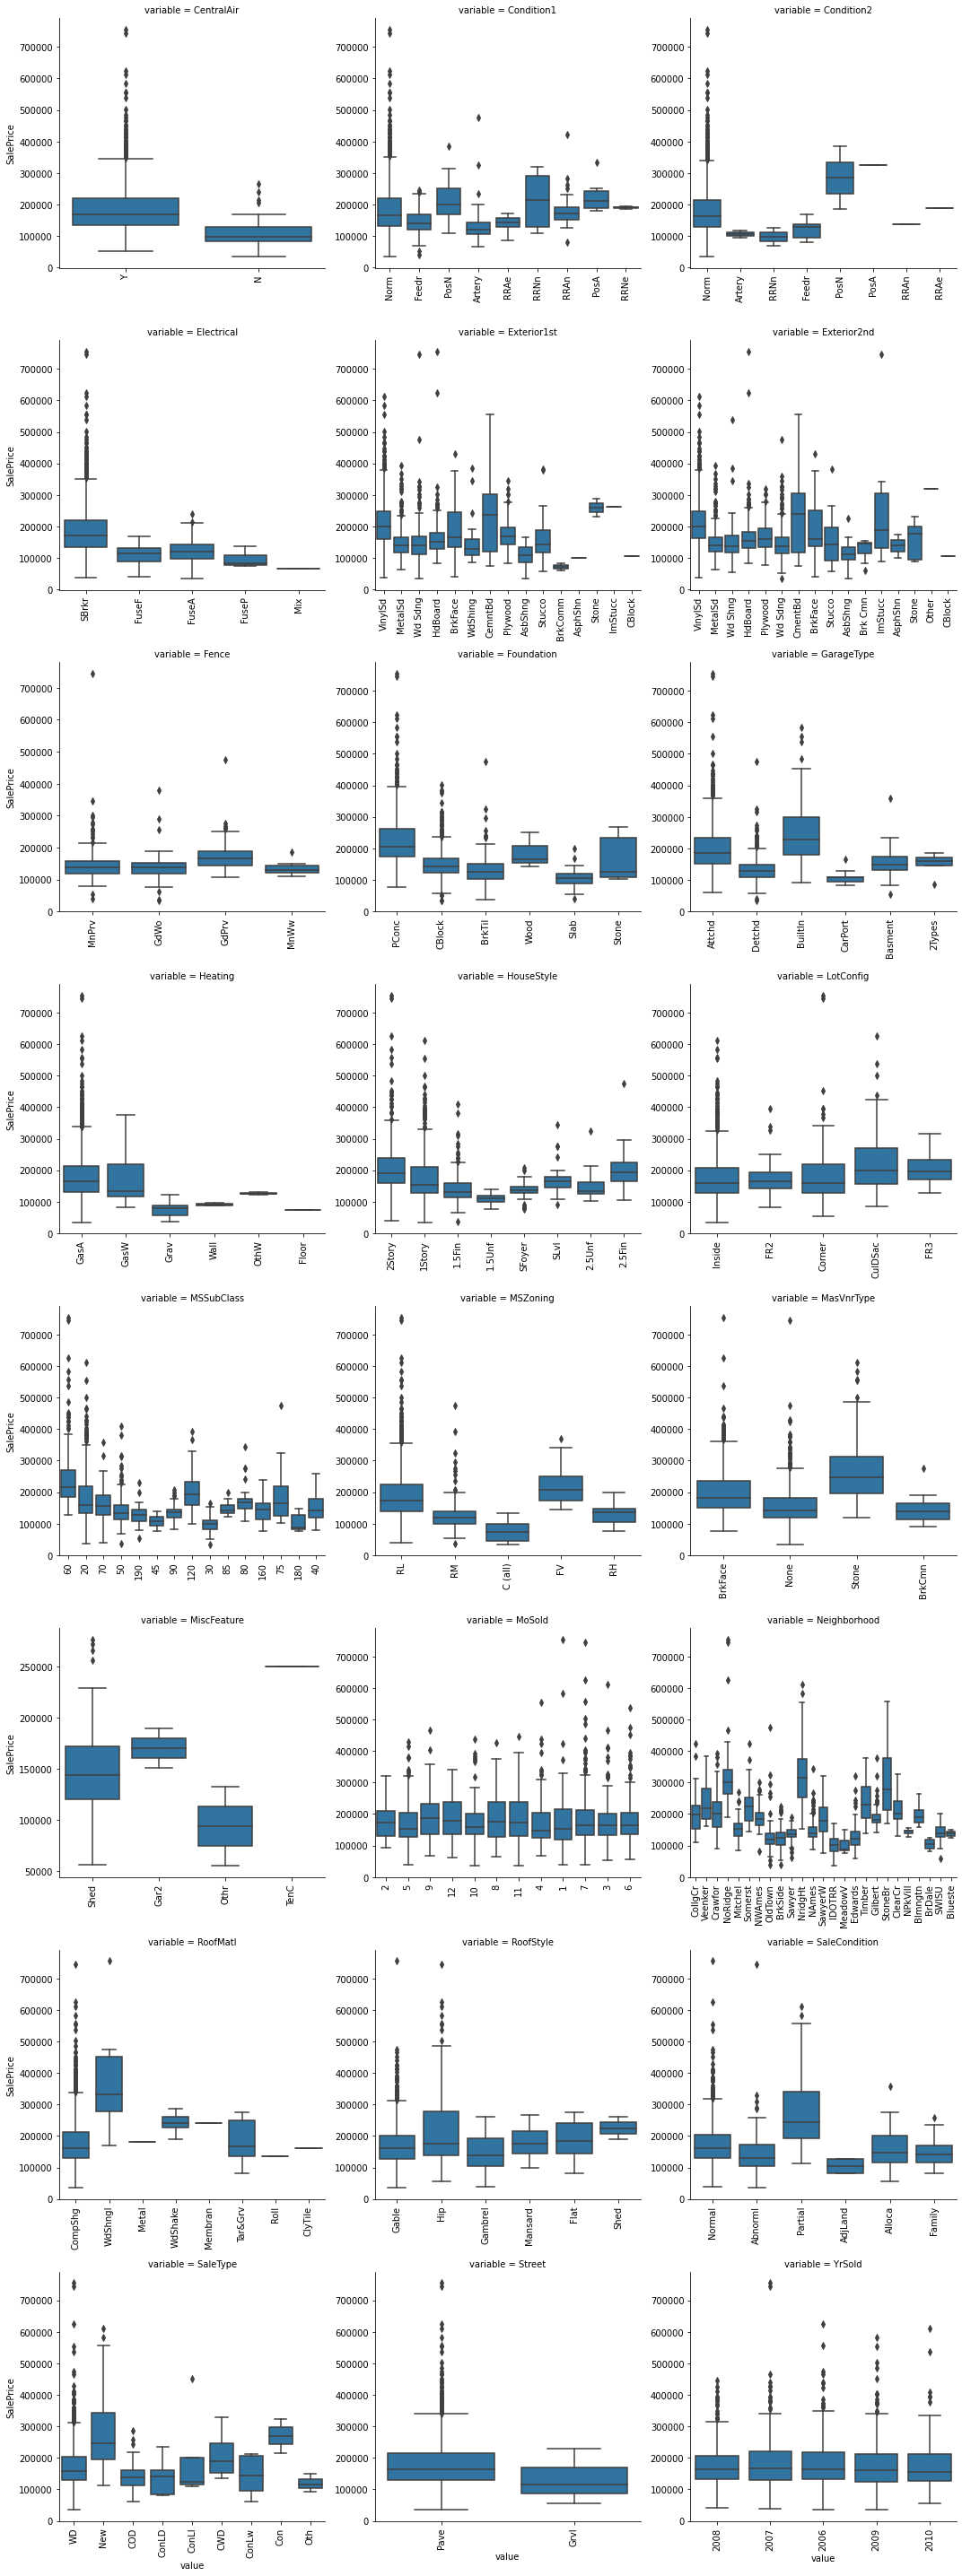

In [ ]:
# Count plots of categorical features
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=sorted(categorical_data)) 
g = sns.FacetGrid(f, col='variable' , col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()


In [ ]:
# Below we calculate the f statistics and p value for the categorical features
import scipy.stats
categorical_features = categorical_data.columns
df_train[categorical_features] = df_train[categorical_features].fillna('Missing')

#onward...
anova = {'feature':[], 'f':[], 'p':[]}
for categorical in categorical_features:
  group_prices = []
  for group in df_train[categorical].unique():
    group_prices.append(df_train[df_train[categorical] == group]['SalePrice'].values)
  f, p = scipy.stats.f_oneway(*group_prices)
  anova['feature'].append(categorical)
  anova['f'].append(f)
  anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature', 'f', 'p']]
anova.sort_values('p', inplace=True)


In [ ]:
anova

,feature,f,p
4,Neighborhood,71.784865,1.558600e-225
13,Foundation,100.253851,5.791895e-91
17,GarageType,80.379992,6.117026e-87
0,MSSubClass,33.732076,8.662166e-79
12,MasVnrType,84.672201,1.054025e-64
23,SaleCondition,45.578428,7.988268e-44
10,Exterior1st,18.611743,2.586089e-43
11,Exterior2nd,17.500840,4.842186e-43
22,SaleType,28.863054,5.039767e-42
1,MSZoning,43.840282,8.817634e-35


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


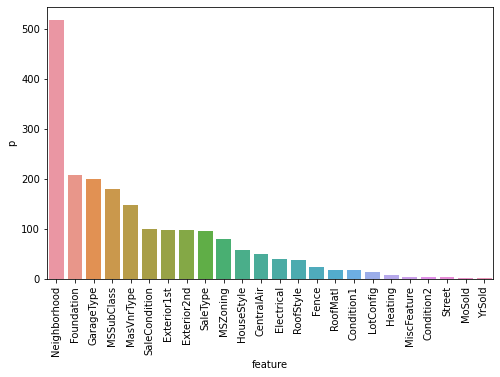

In [ ]:
# Let's plot a barchart on the anova data frame

plt.figure(figsize=(8,5))
sns.barplot(anova.feature, np.log(1./anova['p']))
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Handling Missing values
missing_values = (df_train[categorical_features] == 'Missing').sum().sort_values(ascending=False)
missing_values[missing_values > 0]

df_train.loc[df_train.Electrical == 'Missing', 'Electrical'] = df_train.Electrical.mode()[0]

NameError: ignored

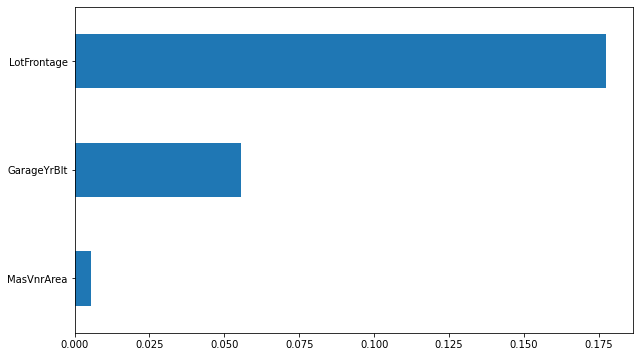

In [ ]:
missing_values = df_train.isnull().sum() / df_train.shape[0]
missing_values[missing_values > 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))
plot.title('Percentage of missing values')
plt.show()


In [ ]:
# Lot frontage (how can there be no street in front of the lot) hence we replace it with the median value
df_train.LotFrontage = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Garage year built, if missing we can set it to zero
df_train.GarageYrBlt.fillna(0, inplace=True)

# Masonary vaneer area, here most values are zero
df_train.MasVnrArea.fillna(0, inplace=True)

In [ ]:
# A closer look at MasVnrType field here

# 1st, I correct the assignment of values and labels
df_train.loc[(df_train.MasVnrType == 'None') &(df_train.MasVnrArea > 1), 'MasVnrType'] = 'Brkface' # most common
df_train.loc[(df_train.MasVnrType == 'None') &(df_train.MasVnrArea == 1), 'MasVnrArea'] = 0 #one sqft is basically 0
for vnr_type in df_train.MasVnrType.unique():

    # Here we set the area equal to the mean of the given vaneer type
    df_train.loc[(df_train.MasVnrType == vnr_type) & (df_train.MasVnrArea == 0), 'MasVnrArea'] = \
        df_train[df_train.MasVnrType == vnr_type].MasVnrArea.mean()

In [ ]:
missing_data = df_train.isnull().sum() / df_train.shape[0]
missing_data

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 81, dtype: float64

In [ ]:
# Checking for duplicates in the datasets
print('Train set duplicate IDs: {}'.format(df_train.duplicated('Id').sum()))
print('Test set duplicate IDs: {}'.format(df_test.duplicated('Id').sum()))

Train set duplicate IDs: 0
Test set duplicate IDs: 0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


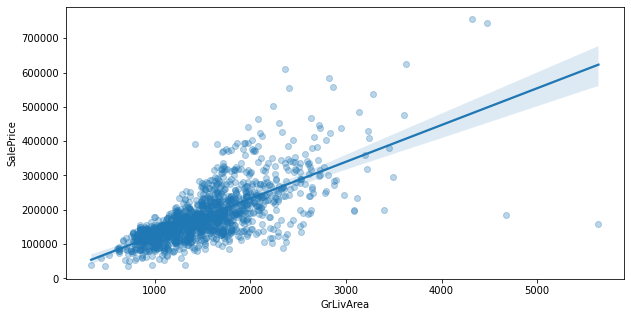

In [ ]:
# Check for outliers
plt.figure (figsize=(10,5))
sns.regplot(df_train.GrLivArea, df_train.SalePrice, scatter_kws={'alpha':0.3})
plt.show()

In [ ]:
# Removing houses which have more than 4000 sq ft
df_train.drop(df_train[df_train.GrLivArea >=4000].index, inplace=True)

Feature Engineering

In [ ]:
# Calculating total square feet (area)
df_train['TotalSF'] = df_train.TotalBsmtSF + df_train.GrLivArea
df_train['TotalFloorSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['TotalPorchSF'] = df_train.OpenPorchSF + df_train.EnclosedPorch + \
      df_train['3SsnPorch'] + df_train['ScreenPorch']

In [ ]:
# Let us create some boolean faetures (Yes-No type)
df_train['HasBasement'] = df_train.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
df_train['HasGarage'] = df_train.GarageArea.apply(lambda x: 1 if x > 0 else 0)
df_train['HasPorch'] = df_train.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
df_train['HasPool'] = df_train.PoolArea.apply(lambda x: 1 if x > 0 else 0)
df_train['WasRemodelled'] = (df_train.YearRemodAdd != df_train.YearBuilt).astype(np.int64)
df_train['IsNew'] = (df_train.YearBuilt > 2000).astype(np.int64)
df_train['WasCompleted'] = (df_train.SaleCondition != 'partial').astype(np.int64)

In [ ]:
boolean_features = ['HasBasement', 'HasGarage', 'HasPorch', 'HasPool', 'WasRemodelled', 'IsNew', 'WasCompleted']

In [ ]:
# Finding numerical features
numeric_data = df_train.select_dtypes(include = [np.number])

# Finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])

# Lets print how many categorical and numeric features we have
print('There are {0} numerical and {1} categorical features in the training data'.\
      format(numeric_data.shape[1], categorical_data.shape[1]))

num_features = numeric_data.columns
cat_features = categorical_data.columns

There are 67 numerical and 24 categorical features in the training data


In [ ]:
# Separate the boolean features from the numerical list
num_features = [f for f in num_features if f not in boolean_features]

In [ ]:
# Total number of bathrooms
df_train['TotalBathrooms'] = df_train.FullBath + .5 * df_train.HalfBath + \
    df_train.BsmtFullBath + .5 * df_train.BsmtHalfBath

In [ ]:
# Finding numerical features
numeric_data = df_train.select_dtypes(include = [np.number])

# Finding categorical features
categorical_data = df_train.select_dtypes(exclude = [np.number])

# Lets print how many categorical and numeric features we have
print('There are {0} numerical and {1} categorical features in the training data'.\
      format(numeric_data.shape[1], categorical_data.shape[1]))

num_features = numeric_data.columns
cat_features = categorical_data.columns

There are 68 numerical and 24 categorical features in the training data


In [ ]:
# Next we will apply some log transformation
features = num_features = ['SalePrice']
for f in features:
    df_train.loc[:,'f'] = np.log1p(df_train[f])

In [ ]:
#We do some data seperation
# Assign the sale price to a variable Y
# Drop SalePrice from the training data as we are putting the house features in one data frame
# Drop Id feature as it is no longer needed
# This will give us model data, which we can apply some regularization after the many columns that will be generated by applying one-hot encoding

y = df_train['SalePrice']
df_train.drop('SalePrice', axis=1, inplace=True)
df_train.drop('Id', axis=1, inplace=True)

# Get dummies with one-hot encoding method
model_data = pd.get_dummies(df_train).copy()


In [ ]:
model_data.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,BldgType,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,0.0,1,4,4,3,1,7,5,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,0.0,1,4,4,3,1,6,8,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,0.0,2,4,4,3,1,7,5,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,0.0,2,4,4,3,1,7,5,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,0.0,2,4,4,3,1,8,5,...,0,0,0,1,0,0,0,0,1,0


In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(model_data.copy(), y, test_size=0.3, random_state=42)

print('Shapes')
print('X_train:', X_train.shape)
print('X_val:', X_test.shape)
print('y_train:', y_train.shape)
print('y_val:', y_test.shape)

Shapes
X_train: (1019, 264)
X_val: (437, 264)
y_train: (1019,)
y_val: (437,)


In [ ]:
# Remove Id and SalePrice from num_features
#num_features.remove('Id')
#num_features.remove('y')

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler

# This step is to ensure that the mean of the numerical features is at 0, with a standard dviation of 1
stdsc = StandardScaler()
X_train.loc[:,num_features] = stdsc.fit_transform(X_train[num_features])
X_test.loc[:,num_features] = stdsc.fit_transform(X_test[num_features])

# Note, we are only standardizing numerical features, not the dummy features

In [ ]:
from sklearn.model_selection import cross_val_score

def rsme(model, X, y):
  cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
  return np.sqrt(cv_scores)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 25.], 'max_iter': [150000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']


# Hone in
param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)], 'max_iter': [150000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

print('Lasso -> Train RMSE: {:.5f} | Test RMSE: {:.5f} | alpha: {:.5f}'. format(
    rmse(lasso, X_train, y_train).mean(), rmse(lasso, X_test, y_test).mean(), alpha))

Lasso -> Train RSME: 10.71088 | Test RSME: 8.26117 | alpha: 0.60000


LASSO dropped 222 of 264 features.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


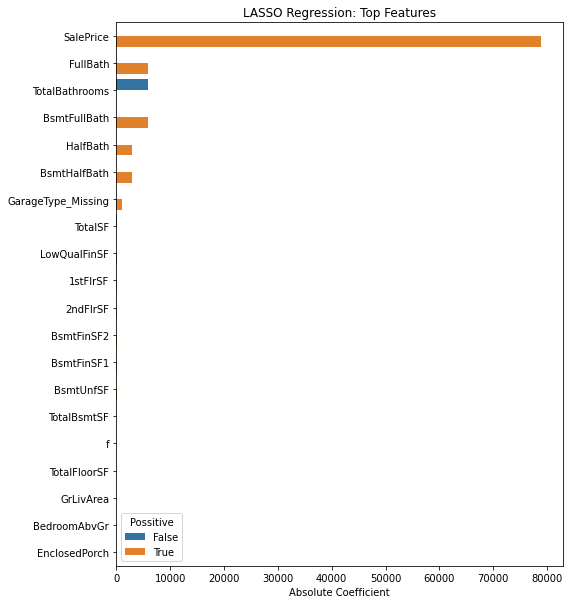

In [ ]:
import seaborn as sns 
coefs = pd.DataFrame({'coefs':lasso.coef_,'Possitive':lasso.coef_> 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('LASSO dropped {} of {} features.'.format(
    sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending = False).head(20)
plt.figure(figsize=(8,10))
sns.barplot(top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Possitive)
plt.title('LASSO Regression: Top Features')
plt.xlabel('Absolute Coefficient')
plt.show()


In [ ]:
# Now lets apply XGBoost library
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                    gamma=0.0,
                    learning_rate=0.5,
                    max_depth=6,
                    min_child_weight=1.5,
                    n_estimators=7200,
                    reg_alpha=0.9,
                    reg_lambda=0.6,
                    subsample=0.2,
                    seed=42,
                    silent=1)
regr.fit(X_train[top_coefs.index], y_train)

XGBRegressor(colsample_bytree=0.2, gamma=0.0, learning_rate=0.5, max_depth=6,
             min_child_weight=1.5, n_estimators=7200, reg_alpha=0.9,
             reg_lambda=0.6, seed=42, silent=1, subsample=0.2)

In [ ]:
from sklearn.metrics import mean_squared_error
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

# Run prediction on training set to get an idea of how well it does
y_pred = regr.predict(X_test[top_coefs.index])

print("XGBoost score on training set: ", rmse(y_test, y_pred))

XGBoost score on training set:  38260.890302358566
